In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import glacierml as gl
import numpy as np
from scipy.stats import gaussian_kde
from tqdm import tqdm
pd.set_option('display.max_columns', None)


In [101]:
dft = pd.read_csv('aggregated/sermeq_aggregated_bootstrap_predictions.csv')
ref = pd.read_csv('reference_thicknesses/Farinotti_mean_thickness_RGI_ID_2.csv')
ref = ref[[
    'RGIId',
    'Farinotti Mean Thickness'
]]
ref['region'] = ref['RGIId'].str[6:8]
ref = ref.sort_values('RGIId')
ref = ref.dropna()
RGI = gl.RGI_loader(
    
)
RGI = RGI[[
    'RGIId',
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax'
]]

# drops = RGI[
# #     (RGI['Aspect'] < 0) | 
#     (RGI['Zmin'] < 0) |
#     (RGI['Zmax'] < 0) |
#     (RGI['Lmax'] < 0) 

# ].index
# RGI = RGI.drop(drops)
RGI['Zdelta'] = RGI['Zmax'] - RGI['Zmin']
# RGI

ref = pd.merge(ref, RGI, on = 'RGIId')

ref = pd.merge(ref, dft, 
#                left_index = True, right_index = True)
on = [
    'RGIId'
])
ref = ref.rename(columns = {
    'Mean Thickness':'Edasi Mean Thickness'
})

ref['Farinotti Volume'] = (ref['Farinotti Mean Thickness'] / 1e3 )* ref['Area']

ref['region'] = ref['RGIId'].str[6:8]
ref['Edasi Volume'] = (ref['Edasi Mean Thickness'] / 1e3) * ref['Area']
ref['Volume Std Dev'] = (ref['Thickness Std Dev'] / 1e3 )* ref['Area']
ref = ref.reset_index()
ref = ref.drop('index', axis = 1)

ref['VE / VF'] = ref['Edasi Mean Thickness'] / ref['Farinotti Mean Thickness']
ref = ref.drop_duplicates()
ref = ref.dropna()
# sum(ref['volume km3'])
ref

,RGIId,Farinotti Mean Thickness,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Zdelta,Unnamed: 0,Edasi Mean Thickness,Median Thickness,Thickness Std Dev,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Lower Bound,Upper Bound,Median Value,Farinotti Volume,Edasi Volume,Volume Std Dev,VE / VF
0,RGI60-01.00001,21.182035,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,789,0,14.841929,14.226050,7.197743,0.974259,1.721300e-27,8.942386,7.885554,21.626253,14.226050,0.007626,0.005343,0.002591,0.700685
1,RGI60-01.00002,30.519478,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,431,1,35.318791,35.053523,5.178314,0.966729,9.273571e-31,5.944721,30.864175,39.845612,35.053523,0.017030,0.019708,0.002889,1.157254
2,RGI60-01.00003,35.518610,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,573,2,33.070411,32.592387,4.846715,0.958427,9.373772e-34,5.443084,28.916565,37.291615,32.592387,0.059849,0.055724,0.008167,0.931073
3,RGI60-01.00004,53.077263,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,1044,3,40.322059,39.819495,5.175665,0.980968,6.835554e-24,6.095077,35.648320,45.116479,39.819495,0.195377,0.148425,0.019052,0.759686
4,RGI60-01.00005,47.519207,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,823,4,42.108854,41.651334,5.433712,0.983602,3.243421e-22,6.543149,37.342863,47.168816,41.651334,0.122267,0.108346,0.013981,0.886144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215482,RGI60-19.02748,12.948014,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,200,216454,26.798332,24.811207,13.271253,0.961854,1.399892e-32,17.077573,14.143986,39.744851,24.811207,0.000544,0.001126,0.000557,2.069687
215483,RGI60-19.02749,22.894110,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,500,216455,37.231512,35.736298,14.775759,0.980468,3.438035e-24,19.285031,23.007389,51.508082,35.736298,0.012981,0.021110,0.008378,1.626249
215484,RGI60-19.02750,60.874610,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,1100,216456,73.363529,71.971468,21.894920,0.992775,3.735962e-14,28.705928,52.045433,94.994497,71.971468,0.250682,0.302111,0.090163,1.205158
215485,RGI60-19.02751,10.053704,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,100,216457,90.873023,88.635585,25.404969,0.988782,3.084626e-18,33.489690,66.231848,116.174542,88.635585,0.000111,0.001000,0.000279,9.038761


In [107]:
ref['UB'] = (ref['Upper Bound'] / 1e3) * ref['Area']
ref['LB'] = (ref['Lower Bound'] / 1e3) * ref['Area']
ref

,RGIId,Farinotti Mean Thickness,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Zdelta,Unnamed: 0,Edasi Mean Thickness,Median Thickness,Thickness Std Dev,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Lower Bound,Upper Bound,Median Value,Farinotti Volume,Edasi Volume,Volume Std Dev,VE / VF,UB,LB
0,RGI60-01.00001,21.182035,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,789,0,14.841929,14.226050,7.197743,0.974259,1.721300e-27,8.942386,7.885554,21.626253,14.226050,0.007626,0.005343,0.002591,0.700685,0.007785,0.002839
1,RGI60-01.00002,30.519478,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,431,1,35.318791,35.053523,5.178314,0.966729,9.273571e-31,5.944721,30.864175,39.845612,35.053523,0.017030,0.019708,0.002889,1.157254,0.022234,0.017222
2,RGI60-01.00003,35.518610,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,573,2,33.070411,32.592387,4.846715,0.958427,9.373772e-34,5.443084,28.916565,37.291615,32.592387,0.059849,0.055724,0.008167,0.931073,0.062836,0.048724
3,RGI60-01.00004,53.077263,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,1044,3,40.322059,39.819495,5.175665,0.980968,6.835554e-24,6.095077,35.648320,45.116479,39.819495,0.195377,0.148425,0.019052,0.759686,0.166074,0.131221
4,RGI60-01.00005,47.519207,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,823,4,42.108854,41.651334,5.433712,0.983602,3.243421e-22,6.543149,37.342863,47.168816,41.651334,0.122267,0.108346,0.013981,0.886144,0.121365,0.096083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215482,RGI60-19.02748,12.948014,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,200,216454,26.798332,24.811207,13.271253,0.961854,1.399892e-32,17.077573,14.143986,39.744851,24.811207,0.000544,0.001126,0.000557,2.069687,0.001669,0.000594
215483,RGI60-19.02749,22.894110,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,500,216455,37.231512,35.736298,14.775759,0.980468,3.438035e-24,19.285031,23.007389,51.508082,35.736298,0.012981,0.021110,0.008378,1.626249,0.029205,0.013045
215484,RGI60-19.02750,60.874610,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,1100,216456,73.363529,71.971468,21.894920,0.992775,3.735962e-14,28.705928,52.045433,94.994497,71.971468,0.250682,0.302111,0.090163,1.205158,0.391187,0.214323
215485,RGI60-19.02751,10.053704,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,100,216457,90.873023,88.635585,25.404969,0.988782,3.084626e-18,33.489690,66.231848,116.174542,88.635585,0.000111,0.001000,0.000279,9.038761,0.001278,0.000729


In [ ]:
vol_f = ref['Farinotti Volume']
vol_e = ref['Edasi Volume']

data_1 = ref['Farinotti Mean Thickness'] * ref['Area']
data_2 = ref['Edasi Mean Thickness'] * ref['Area']

x_1 = np.sort(data_1)
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

x_2 = np.sort(data_2)
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

# Calculate the point density
xy = np.vstack([np.log10(vol_f),np.log10(vol_e)])

z = gaussian_kde(xy)(xy)

In [ ]:
bins_x = np.logspace(np.log10(np.min(vol_f)), np.log10(np.max(vol_f)), 25)
bins_y = np.logspace(np.log10(np.min(vol_e)), np.log10(np.max(vol_e)), 25)


In [ ]:
def scatter_hist(x, y, ax, 
                 ax_histx, ax_histy
                ):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(vol_f, vol_e, 
               c = (z), 
               s = 100,
               cmap = 'viridis',
               marker = '.')
    ax.plot(
        (0,(ref['Farinotti Volume'].max())),
        (0,ref['Farinotti Volume'].max()),
        '-',
        c = 'orange'

    )
    ax_histx.hist(
        (vol_f), 
        bins = bins_x,
        edgecolor = 'black',
        log = True
    )
    
    ax_histy.hist(
        (vol_e), 
        bins = bins_y, 
        edgecolor = 'black',
        orientation='horizontal',
        log = True
    )

    
fig = plt.figure(figsize=(15,15))

gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex = ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey = ax)



# Draw the scatter plot and marginals.
print('Drawing scatter plot...')
scatter_hist(
    vol_f, 
    vol_e,
    ax, 
    ax_histx,
    ax_histy,
)
# print(f'xymax = {xymax}')
# print(f'lim = {lim}')
print('Drawing done')
# plt.suptitle('Consistency of Global Glacier Volume Estimates', fontsize=18, y=0.95)
    # ax_histx.set_yscale('log')
print('Setting scales and labels...')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Edasi Volume (10^3 km^3)')
ax.set_xlabel('Farinotti Volume (10^3 km^3)')
print('Saving....')
plt.savefig('figs/scatter/scatter_hist.eps')
plt.savefig('figs/scatter/scatter_hist.svg')

In [ ]:

fig, ax = plt.subplots(1,1,figsize = (12, 4))
# plt.suptitle('Global Estimates of Mountain Glacier Volume')
x = (90.54894200610966,140.8,158.17)
yr = (36.94737323907368,40.4,41.03,)

# y = (-1, 0, 1)

y = (
     f'Edasi 2022 \n$\Sigma$ = {np.round(yr[2] / x[2] * 100, 2)}%',
     f'Millan 2022 \n$\Sigma$ = {np.round(yr[1] / x[1] * 100, 2)}%',
     f'Farinotti 2019 \n$\Sigma$ = {np.round(yr[0] / x[0] * 100, 2)}%',
)
plt.errorbar(x, y, xerr = yr, linestyle='None', 
             marker='o', markerfacecolor = 'k', markersize = 15, 
             ecolor = 'b', color = 'k', linewidth = 10, capsize = 20.5, capthick = 3
            )
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=12)
# ax.margins(0.1, None)
ax.set_ylim(-0.5, 2.5)
plt.xlabel('10^3 km^3', fontsize = 12)
plt.grid(visible = True, axis = 'both')
# plt.show()
plt.savefig('figs/err_bars/global.svg')
plt.savefig('figs/err_bars/global.eps')
plt.savefig('figs/err_bars/global.png')

In [113]:
for region in ref['region'].unique():
    dft = ref[ref['region'] == region]
    upper_bound = np.round(
        sum(
        (
            ((dft['Upper Bound'] - dft['Edasi Mean Thickness'])/ 1e3) * dft['Area']
        ) / 1e3), 2
    ) 
    
    lower_bound = np.round(
        sum(
            (
                ((dft['Edasi Mean Thickness'] - dft['Lower Bound'])/ 1e3) * dft['Area']
            ) / 1e3 ), 2
    ) 
    
    print(f'Region: {region}, UB: {upper_bound}, LB: {lower_bound}')

Region: 01, UB: 4.01, LB: 3.98
Region: 02, UB: 0.1, LB: 0.09
Region: 03, UB: 5.34, LB: 5.7
Region: 04, UB: 1.05, LB: 1.13
Region: 05, UB: 3.82, LB: 4.33
Region: 06, UB: 0.58, LB: 0.61
Region: 07, UB: 0.8, LB: 0.83
Region: 08, UB: 0.02, LB: 0.01
Region: 09, UB: 1.45, LB: 1.52
Region: 10, UB: 0.02, LB: 0.02
Region: 11, UB: 0.01, LB: 0.01
Region: 12, UB: 0.01, LB: 0.01
Region: 13, UB: 0.48, LB: 0.47
Region: 14, UB: 0.59, LB: 0.58
Region: 15, UB: 0.14, LB: 0.14
Region: 16, UB: 0.02, LB: 0.02
Region: 17, UB: 0.88, LB: 0.86
Region: 18, UB: 0.03, LB: 0.02
Region: 19, UB: 15.13, LB: 17.49


In [114]:
df_errors = pd.DataFrame({
    'Model':['Farinotti Predicted', 'Farinotti Error',
             'Millan Predicted', 'Millan Error',
             'Edasi Predicted', 'Edasi STD', 'Edasi UB', 'Edasi LB'],
    'RGI region 01':[20.04, 5.19, 0, 0, 14.51, 4.20, 4.01, 3.98],
    'RGI region 02':[1.06, 0.27, 0, 0, 0.74, 0.11, 0.1, 0.09],
    'RGI region 03':[28.33,7.35, 25.4, 7.2, 14.22, 5.69, 5.34, 5.7],
    'RGI region 04':[8.61, 2.23, 7.0, 2.1, 3.96, 1.13, 1.05, 1.13],
    'RGI region 05':[15.69, 4.07, 11.8, 3.7, 19.86, 8.80, 3.82, 4.33],
    'RGI region 06':[3.77, 0.98, 3.7, 0.9, 1.53, 0.62, 0.58, 0.61],
    'RGI region 07':[7.47, 1.94, 7.0, 2.3, 3.84, 0.87 , 0.8, 0.83],
    'RGI region 08':[0.30, 0.08, 0.29, 0.1, 0.21, 0.02, 0.02, 0.01],
    'RGI region 09':[14.64, 3.80, 15.5, 3.9, 5.10, 1.56, 1.45, 1.52],
    'RGI region 10':[0.14, 0.04, 0.09, 0.05, 0.19, 0.02, 0.02, 0.02],
    'RGI region 11':[0.13, 0.03, 0.12, 0.05, 0.17, 0.01, 0.01, 0.01],
    'RGI region 12':[0.06, 0.02, 0.06, 0.03, 0.08, 0.01, 0.01, 0.01],
    'RGI region 13':[3.27, 0.85, 0, 0, 3.42, 0.53, 0.48, 0.47],
    'RGI region 14':[2.87, 0.74, 0, 0, 3.23, 0.64, 0.59, 0.58],
    'RGI region 15':[0.88, 0.23, 0, 0, 1.10, 0.16, 0.14, 0.14],
#     '13 + 14 + 15':[7.02, 9.6 , 7.75712821006],
#     '13 + 14 + 15 sigma':[1.82 , 3.7, 1.32689587991],
    'RGI region 16':[0.10, 0.03, 0.07, 0.04, 0.07, 0.02 , 0.02, 0.02],
    'RGI region 17':[5.34, 1.39, 5.9, 1.6, 3.50, 0.91, 0.88, 0.86],
    'RGI region 18':[0.07, 0.02, 0.07, 0.03, 0.12, 0.03, 0.03, 0.02],
    'RGI region 19':[46.47, 12.06, 35.1, 9.1, 23.58, 16.20, 15.13, 17.49],
#     '19 sigma':[12.06,9.1, 16.200065769513607],
})


df_errors

,Model,RGI region 01,RGI region 02,RGI region 03,RGI region 04,RGI region 05,RGI region 06,RGI region 07,RGI region 08,RGI region 09,RGI region 10,RGI region 11,RGI region 12,RGI region 13,RGI region 14,RGI region 15,RGI region 16,RGI region 17,RGI region 18,RGI region 19
0,Farinotti Predicted,20.04,1.06,28.33,8.61,15.69,3.77,7.47,0.30,14.64,0.14,0.13,0.06,3.27,2.87,0.88,0.10,5.34,0.07,46.47
1,Farinotti Error,5.19,0.27,7.35,2.23,4.07,0.98,1.94,0.08,3.80,0.04,0.03,0.02,0.85,0.74,0.23,0.03,1.39,0.02,12.06
2,Millan Predicted,0.00,0.00,25.40,7.00,11.80,3.70,7.00,0.29,15.50,0.09,0.12,0.06,0.00,0.00,0.00,0.07,5.90,0.07,35.10
3,Millan Error,0.00,0.00,7.20,2.10,3.70,0.90,2.30,0.10,3.90,0.05,0.05,0.03,0.00,0.00,0.00,0.04,1.60,0.03,9.10
4,Edasi Predicted,14.51,0.74,14.22,3.96,19.86,1.53,3.84,0.21,5.10,0.19,0.17,0.08,3.42,3.23,1.10,0.07,3.50,0.12,23.58
5,Edasi STD,4.20,0.11,5.69,1.13,8.80,0.62,0.87,0.02,1.56,0.02,0.01,0.01,0.53,0.64,0.16,0.02,0.91,0.03,16.20
6,Edasi UB,4.01,0.10,5.34,1.05,3.82,0.58,0.80,0.02,1.45,0.02,0.01,0.01,0.48,0.59,0.14,0.02,0.88,0.03,15.13
7,Edasi LB,3.98,0.09,5.70,1.13,4.33,0.61,0.83,0.01,1.52,0.02,0.01,0.01,0.47,0.58,0.14,0.02,0.86,0.02,17.49


In [92]:
df_errors.T

,0,1,2,3,4,5,6,7
Model,Farinotti Predicted,Farinotti Error,Millan Predicted,Millan Error,Edasi Predicted,Edasi STD,Edasi UB,Edasi LB
RGI region 01,20.04,5.19,nan,nan,14.51,4.2,UB,LB
RGI region 02,1.06,0.27,0.0,0.0,0.74,0.11,UB,LB
RGI region 03,28.33,7.35,25.4,7.2,14.22,5.69,UB,LB
RGI region 04,8.61,2.23,7.0,2.1,3.96,1.13,UB,LB
RGI region 05,15.69,4.07,11.8,3.7,19.86,8.8,UB,LB
RGI region 06,3.77,0.98,3.7,0.9,1.53,0.62,UB,LB
RGI region 07,7.47,1.94,7.0,2.3,3.84,0.87,UB,LB
RGI region 08,0.3,0.08,0.29,0.1,0.21,0.02,UB,LB
RGI region 09,14.64,3.8,15.5,3.9,5.1,1.56,UB,LB


In [70]:
for i in col1:
    print(i)

RGI region 01
RGI region 02
RGI region 03
RGI region 04
RGI region 05
RGI region 06
RGI region 07
RGI region 08
RGI region 09
RGI region 10
RGI region 11
RGI region 12
RGI region 13
RGI region 14
RGI region 15
RGI region 16
RGI region 17
RGI region 18
RGI region 19


In [83]:
df_errors = df_errors.round(decimals = 2)

In [115]:
df_errors_text = df_errors.copy()

In [73]:
col1

Index(['RGI region 01', 'RGI region 02', 'RGI region 03', 'RGI region 04',
       'RGI region 05', 'RGI region 06', 'RGI region 07', 'RGI region 08',
       'RGI region 09', 'RGI region 10', 'RGI region 11', 'RGI region 12',
       'RGI region 13', 'RGI region 14', 'RGI region 15', 'RGI region 16',
       'RGI region 17', 'RGI region 18', 'RGI region 19'],
      dtype='object')

100%|██████████| 95/95 [00:00<00:00, 48657.82it/s]
19it [00:00, 2659.05it/s]
19it [00:00, 33.62it/s]


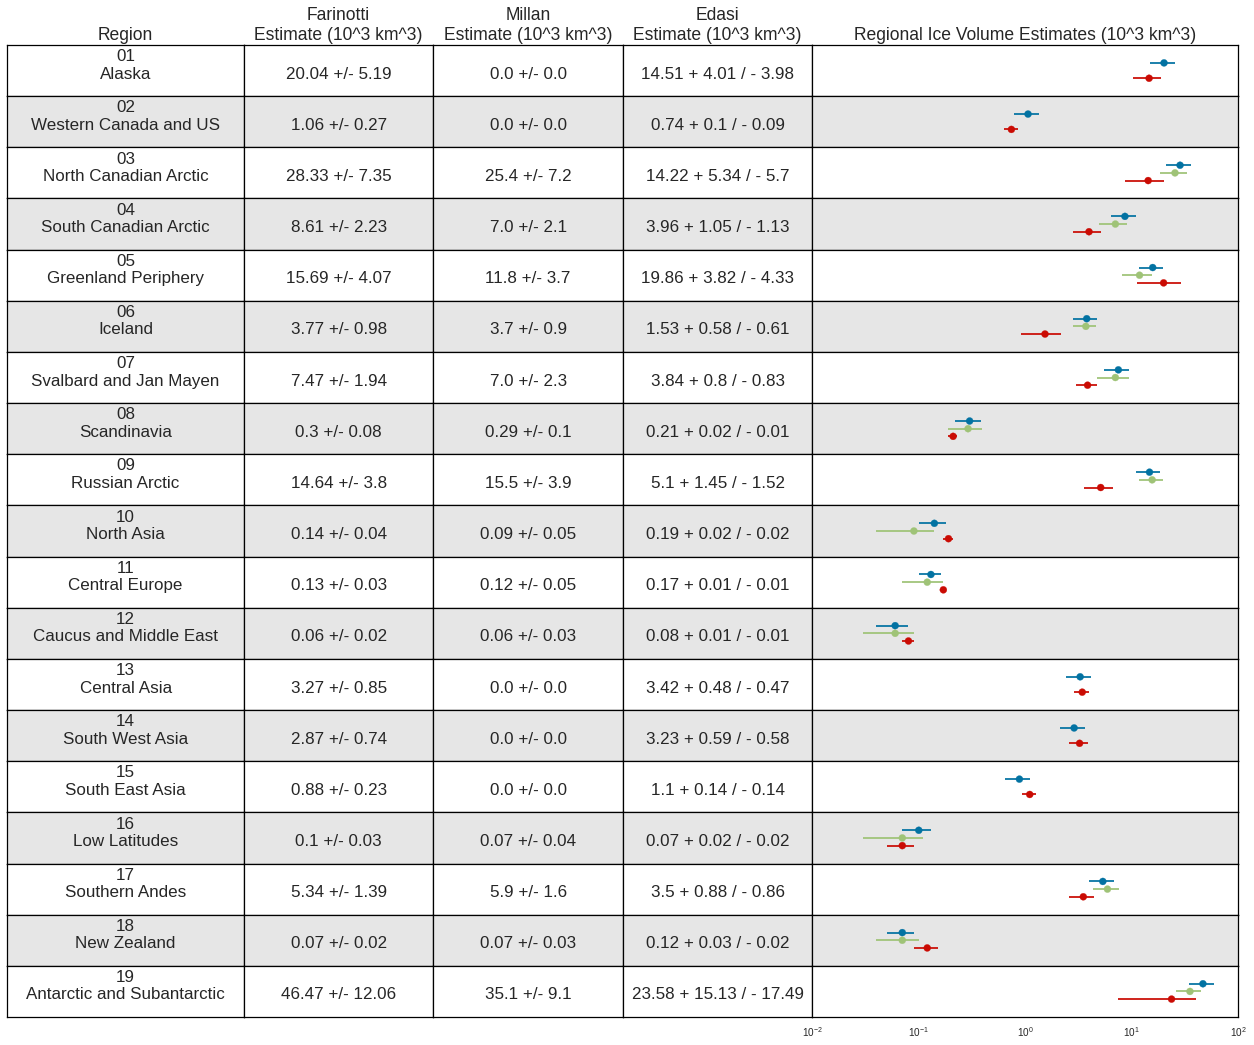

In [140]:
col1 = df_errors_text.columns[1:]

fig, axes = plt.subplots(
    ncols=5, nrows=19, figsize=(19,15),
    gridspec_kw={"width_ratios":[5,4,4,4,9]},
    sharex = True, sharey = True,
#     facecolor = '0.8'
                        )
fig.subplots_adjust(.05, 0.05, .95 , 0.95, wspace=0.0001, hspace=0.0001)
    
for ax in tqdm((axes.flatten()[:-1])):
    ax.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
    ax.ticklabel_format(useOffset=False, style="plain")
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    
for ax in tqdm((axes.flatten())):

    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')

#     for _, s in ax.spines.items():
#         s.set_visible(False)
#         ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
        

# border = fig.add_subplot(111)
# border.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
# border.set_facecolor("None")

text_kw = dict(ha = 'center', va = 'bottom', size=17)

region_list = [
    'Alaska',
    'Western Canada and US',
    'North Canadian Arctic',
    'South Canadian Arctic',
    'Greenland Periphery',
    'Iceland',
    'Svalbard and Jan Mayen',
    'Scandinavia',
    'Russian Arctic',
    'North Asia',
    'Central Europe',
    'Caucus and Middle East',
    'Central Asia',
    'South West Asia',
    'South East Asia',
    'Low Latitudes',
    'Southern Andes',
    'New Zealand',
    'Antarctic and Subantarctic'
]
for i, ax in tqdm(enumerate(axes[:,0])):
#     print(i)
    ax.text(
        0.5,
        0.3, 
        col1[i][-2:] + '\n' + region_list[i], 
        transform = ax.transAxes, 
        **text_kw
    )
    
    ax.grid(visible = False)
    
# estimate and error
for i, ax in enumerate(axes[:,1]):
        
    ax.text(
        0.5,
        0.3, 
        str(
            df_errors_text[col1[i]].loc[0]) + ' +/- ' + str(
            df_errors_text[col1[i]].loc[1] ),
        transform = ax.transAxes, 
        **text_kw
    )
    xerr = x_e_err,
    ax.grid(visible = False)
for i, ax in enumerate(axes[:,2]):
        
    ax.text(
        0.5,
        0.3, 
        str(
            df_errors_text[col1[i]].loc[2]) + ' +/- ' + str(
            df_errors_text[col1[i]].loc[3] ),
        transform = ax.transAxes, 
        **text_kw
    )
    xerr = x_e_err,
    ax.grid(visible = False)
for i, ax in enumerate(axes[:,3]):
        
    ax.text(
        0.5,
        0.3, 
        str(
            df_errors_text[col1[i]].loc[4]) + ' + ' + str(
            df_errors_text[col1[i]].loc[6] ) + ' / - ' + str(
            df_errors_text[col1[i]].loc[7]
        ),
        transform = ax.transAxes, 
        **text_kw
    )
    xerr = x_e_err,
    ax.grid(visible = False)
        
#         if n % 2 != 0:
#             ax.set_facecolor('0.8')

#         break
for i, ax in tqdm(enumerate(axes[:,4])):
    #farinoitt est & errors
    x_f = df_errors[col1[i]].iloc[0]
    x_f_err = df_errors[col1[i]].loc[1]
    
    
    # Millan est & errors
    x_m = df_errors[col1[i]].iloc[2]
    
    x_m_err = df_errors[col1[i]].loc[3]
    # Edasi est & errors
    x_e = df_errors[col1[i]].iloc[4]
    x_e_err = df_errors[col1[i]].loc[5]
    

    ax.scatter(
        x = ([x_f, x_m, x_e]), 
        y = [1.5, 0, -1.5],
        c = ['C0', 'C1', 'C2'],
#         marker = '.',
        alpha = 1
        
    )

    ax.errorbar(
        x = x_f,
        y =  1.5,
        ecolor = 'C0',
#         elinewidth = 0.5,
        xerr = x_f_err,
        label = ['Farinotti']
    )
    ax.errorbar(
        x = x_m ,
        y = 0,
        ecolor = 'C1',
#         elinewidth = 0.5,
        xerr = x_m_err,
        label = ['Millan']
    )
    ax.errorbar(
        x = x_e ,
        y = -1.5,
        ecolor = 'C2',
#         elinewidth = 0.5,
        xerr = x_e_err,
        label = ['Edasi']
    )
    ax.set_xlim((0.01,100))
    ax.set_ylim((-5,5))
    ax.set_xscale('log')
    grid_kw = dict(color = 'black')
#     plt.grid(b=None)

    ax.grid(visible = False,
#             **grid_kw
           )
#     break
    
# for i, ax in tqdm(enumerate(axes[0,:])):
#     ax.set_title(df_errors['Model'].loc[i])
axes[0,0].set_title('Region', fontsize = 17.5,
                   fontweight = 500)
axes[0,1].set_title('Farinotti\nEstimate (10^3 km^3)', fontsize = 17.5,
                   fontweight = 500)
# axes[0,2].set_title('Farinotti\nError')
axes[0,2].set_title('Millan\nEstimate (10^3 km^3)', fontsize = 17.5,
                   fontweight = 500)
# axes[0,4].set_title('Millan\nError')
axes[0,3].set_title('Edasi\nEstimate (10^3 km^3)', fontsize = 17.5,
                   fontweight = 500)
# axes[0,6].set_title('Edasi\nError')
axes[0,4].set_title('Regional Ice Volume Estimates (10^3 km^3)',
                    fontsize = 17.5, 
                    fontweight = 500
                   )
for n in range(0, 19, 1):
    if n % 2 != 0:
        axes[n,0].set_facecolor('0.9')
        axes[n,1].set_facecolor('0.9')
        axes[n,2].set_facecolor('0.9')
        axes[n,3].set_facecolor('0.9')
        axes[n,4].set_facecolor('0.9')
#         axes[n,5].set_facecolor('0.8')
#         axes[n,6].set_facecolor('0.8')
#         axes[n,7].set_facecolor('0.8')


        
# plt.tight_layout()
# plt.subplots_adjust(top = 1)
plt.show()

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,15))
fig.patch.set_facecolor('w')
fig.suptitle('Regional Comparison of Volume Estimates')
             
# print(len(region_list))
for n, region in enumerate(df_errors.columns[1:]): 
#     print(df_errors[region])
    ax = plt.subplot(5,4,n+1)
    ax.set_title(region)
    y = (df_errors[region].loc[0], df_errors[region].loc[2], df_errors[region].loc[4],)
    yr = (df_errors[region].loc[1], df_errors[region].loc[3], df_errors[region].loc[5])
    
    farinotti_region_sigma = yr[0] / y[0] * 100
    millan_region_sigma = yr[1] / y[1] * 100
    edasi_region_sigma = yr[2] / y[2] * 100

    x = (f'Farinotti 2019 \n$\Sigma$ = {farinotti_region_sigma.round(2)}%',
         f'Millan 2022 \n$\Sigma$ = {millan_region_sigma.round(2)}%', 
         f'Edasi 2022 \n$\Sigma$ = {edasi_region_sigma.round(2)}%')
    yr = (df_errors[region].loc[1], df_errors[region].loc[3], df_errors[region].loc[5])
    plt.errorbar(x, y, yerr = yr, linestyle='None', 
                 marker='o', markerfacecolor = 'k', markersize = 8, 
                 ecolor = 'b', color = 'k', linewidth = 5, capsize = 20.5, capthick = 1.5
                )

    plt.ylabel('10^3 km^3')
    plt.grid(visible = True, axis = 'both')
    plt.tight_layout()
#     plt.savefig('figs/err_bars/regional.svg')
#     plt.savefig('figs/err_bars/regional.eps')